**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Jolshyan - Music genre predictor using SVM algorithm

## Abstract

Machine learning data analysis project - Jolshyan. Jolshyan means 'the predictor' in the south Indian language Malayalam. This project works with a data set of 6500 odd different songs as the learning data. We have a labeled dataset of which genre this song belongs to. We target to train the system such that it is able to predict test cases to most accuracy. The second part of the project also tries to list out the probabilistic distribution of different genre traits in test cases given. We have tried out different algorithms such as MLP classifier, Logistic Regression, and Polynomial Regression before we reached out to the SVM algorithm which gave us superior accuracy. 


## 1. Introduction

Machine Learning is the buzzword of the industry. Artificial Intelligence is already revolutionizing mankind, we have already seen the signs of what AI can do in real life scenarios. We believe this project an ideal platform to apply the basic principles and theories that we have learned during the course of the lecture, which will link the gap between academics and industry.

In general, learning outcomes from this project were to do data preprocessing and to learn to implement a real-life machine learning scenario. Furthermore, in data preprocessing, we learned about how to analyze the data and remove outliers. More importantly, we understood what is the effect of outliers on the machine learning system. We also learned how to normalize the data. We also discerned that if we use the raw data without normalization might lead to miss-classification in the test cases. We also learned how to try out different algorithms and improve the accuracy of the machine learning system.

The rest of the paper is organized as follows. Section 2 explains how data processing is done. Section 3 describes the methods and experiments of different machine learning algorithms. In addition, we have our most successful algorithm(SVM) in the scope of the project. Section 4 and Section 5 has Results and Conclusions respectively. Finally, we have references in section 6. 

## 2. Data analysis

### 2.1 Removing Outliers

We skimmed through the data before we started working on the algorithms. We found few outlier columns which had the same value in all the cells of that column. Our approach made sure that whole of 6500 cells had the same value. We used the excel sheet filtering to make sure that those columns were outliers. Outlier columns were deleted so that we could train with better data. Since we edited the data in the training data. we did make the relevant similar change in the test data set. 
PS: Edited training data set has been stored in the same folder of the zip file by the name "train_data_arranged_ptn.csv" and the edited test data has been stored by the name "test_data_arranged_ptn.csv" in the same folder.

### 2.2 Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

from sklearn.preprocessing import QuantileTransformer             # Library for normalisation of data
from sklearn.svm import SVC                                       # Library for Support Vector Classifier
from sklearn.model_selection import GridSearchCV                  # Library for cross validation
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [2]:
Tdt=pd.read_csv(r"train_data_arranged_ptn.csv",header=None)       # import trainning data csv
Tlb=pd.read_csv(r"train_labels_arranged.csv",header=None)         # import trainning labels csv
Test_dt=pd.read_csv(r"test_data_arranged_ptn.csv",header=None)    # import test data csv

The above section of code imports training data, training labels, and test data. 

### 2.3 Normalization of data

In [3]:
Tlb=np.ravel(Tlb)                                                 # Conversion from a col vector to a 1D array
qt = QuantileTransformer(n_quantiles=50, random_state=0)         # This section normalize the data csv
Pre_traindt=qt.fit_transform(Tdt)                                 
Pre_traindt=pd.DataFrame(Pre_traindt)                             
Pre_test_dt=qt.fit_transform(Test_dt) 

Observing the data, we found that data in each column was of different ranges. The drastic range differences will give extra weigth to those columns with higher values. Normalization will avoid that from happening. The above section of code in 2.3 does the normalization part of the code. 

### 2.4 Histogram of labelled data

Labelled data is been plotted as histogram below.
Each of the numbers denotes the songs belonging to that genre. Its evident from the histogram that more than 2000 songs in the training data belong.

1. Pop_Rock

2. Electronic

3. Rap

4. Jazz

5. Latin

6. RnB

7. International

8. Country

9. Reggae

10. Blues



<function matplotlib.pyplot.show(*args, **kw)>

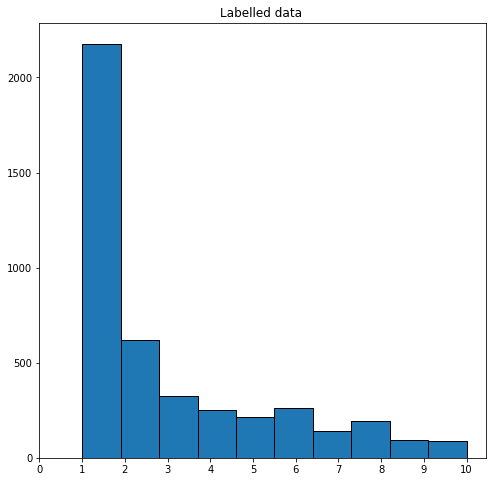

In [4]:
plt.figure(figsize=(8,8))
plt.hist(Tlb,bins=10,histtype='bar',lw=1,ec='black')
plt.title('Labelled data ')
plt.xticks(np.arange(0,11,step=1))
plt.show

## 3. Methods and experiments

### 3.1 Block Diagram of the work process.


![Image](BlockDiagram.png)


We started the project by using the Neural Network algorithm, (Multilayer Perceptron) we got an accuracy rate of 46 percentage with MLP classifier. It took us 10 hours to train the system using MLP classifier. This was below the cut off mark as per the scope of the project. We went on to train the machine learning system with Regression algorithm. We used Logistic Regression and successfully got an accuracy rate of 56 % in the label prediction. Logistic Regression took almost 5 hours to train the system. 


To improve the prediction we thought of trying out the polynomial regression. However, we didn't even get to train the system even after 48 hours. We decided to kill the kernel and proceed with other algorithms, which explains the black color in the block in the block diagram.

We did our research on the data pre-processing to increase the efficiency of machine learning systems. We learned about how outlier data would affect the machine learning system. We decided to delete data outliers. Further, we learned about Support Vector Machine (SVM) algorithm and successfully obtained and 60 percent accuracy for the predicted labels. Machine learning system took almost 24 hours to predict the labels in this case. 

Finally, we also did data normalization and did train the data with SVM to get an accuracy of 66.6% in predicting the labels.
Warning!! It takes may take up to 60 minutes to run the code for accuracy and it may take up to 100 minutes for the log loss code to execute. 

### 3.2 SVM algorithm for Predicting labels( Accuracy)

In [5]:
#The algorithm takes upto 45 mins to run

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 100]}
cls=SVC(gamma=0.001)
clk = GridSearchCV(cls,parameters, cv=5)
clk.fit(Pre_traindt,Tlb,groups=None)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Code for Support Vector machine for predicting the labels is the above the section. We have the gamma value to be at 0.001 and the probabilty is set to fasle by default to get the predicted labels of the test cases of the song.


### 3.3 SVM algorithm for probabilistic prediction (Log-Loss)

In [6]:
#The algorithm takes upto 120 mins to run
parameters = {'kernel':('linear', 'rbf'), 'C':[10,20,1]}
cls=SVC(gamma=0.01,probability=True)
clf = GridSearchCV(cls,parameters, cv=10)
clf.fit(Pre_traindt,Tlb,groups=None)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10, 20, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Code for Support Vector machine for probabilistic prediction is the above the section. We have the gamma value to be at 0.001 and the probabilty is set to true to get the predicted genre probabilities of the test case of the songs. This algorithm will generate how much of each song belong to each genres.

## 4. Results

### 4.1 Accuracy and Log-Loss result percentages

As described in the block diagram of the work process we have tried out different algorithms and finally settled on Support Vector Machine with an accuracy of 66.683% in Accuracy and error of 16.586 % in log loss. Our output files were uploaded into kaggle after making necessary changes to match the kaggle competition format. We were able to be in the top 5 % in the log-loss as kaggle competition. However, when it came to the the accuracy our results were in the top 10 % of the kaggle competition.


### 4.2 Code to output the results

#### 4.2.1 'Accuracy' Output Code

In [11]:
#Predict with test data
Test_pred=clk.predict(Pre_test_dt)
np.savetxt("accuracy_solution.csv", 
           np.dstack((np.arange(1, Test_pred.size+1),Test_pred))[0],
           delimiter=',', comments="", fmt='%i,%i',
           header="Sample_id,Sample_label")

The results of the label prediction is saved in the file 'Output_Accuracy.csv' in the same zip file. 

<function matplotlib.pyplot.show(*args, **kw)>

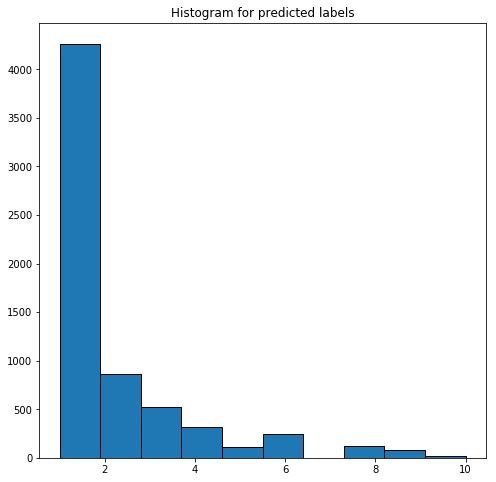

In [8]:
plt.figure(figsize=(8,8))
plt.hist(Test_pred,bins=10,histtype='bar',lw=1,ec='black')
plt.title('Histogram for predicted labels')
plt.show

#### 4.2.2 'Log-Loss' Output Code

In [29]:
#Predict with test data
Test_prob=clf.predict_proba(Pre_test_dt)
sample_id_column = np.zeros((Pre_test_dt.shape[0],1), dtype=int)
for i in range (Pre_test_dt.shape[0]): 
    sample_id_column[i] = i+1
log_loss_solution = np.hstack((sample_id_column,Test_prob))
np.savetxt("log_loss_solution.csv", log_loss_solution, 
           delimiter=',', comments="", fmt=','.join(['%i'] + ['%1.4f']*10),
           header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10")

The results of the log-loss prediction is saved in the file 'Output_Logloss.csv' in the same zip file. 

### 4.3 Confusion Matrix

The Confusion Matrix depicts how the machine learning label can accurately predict Labels for training data in comparison to actual Labels, which were already given as the training data.

In [10]:
# Predicting Training Labels
accuracy_Y_train = clk.predict(Pre_traindt)


# Accuracy Score
print("Accuracy Score: ", accuracy_score(Tlb, accuracy_Y_train))


#Confusion matrix ...
conf_matrix = confusion_matrix(Tlb, accuracy_Y_train)
print('\033[1m' + "\n Table 1: Confusion Matrix of Training Data \n\n" + '\033[0m', conf_matrix)

Accuracy Score:  0.7588815035526014

 Table 1: Confusion Matrix of Training Data 

 [[2060   66   16   11    1   17    0    3    4    0]
 [ 133  449   18    7    0    7    0    2    2    0]
 [  27   10  283    1    1    3    0    0    1    0]
 [  52   17    3  167    1   11    0    1    1    0]
 [ 119    9   10    5   60    7    0    1    2    1]
 [  85   11   16    4    4  138    0    0    0    2]
 [ 100   11    8    4    5    7    1    4    1    0]
 [ 115    1    1    1    2    1    0   74    0    0]
 [  14    3   14    0    0    3    0    0   58    0]
 [  55    1    2    3    1    2    0    1    0   21]]


## 5. Discussion/Conclusions

After trying out differrent machine learning algorithms such as MLP Classifier, Logistic regression and Polynomial regression we settled on support vector machines to get an accuracy of 66.6 % for the predicted labels. 

We had a very steep learning curve during the course of the project. We learned how to apply machine learning algorithms in real life sceienceros. We also got insights on how to process data to make the data much better for machine learning. In additon, we also learned about how to improve accuvarcy bu using different machine learning algosithms. 

## 6. References

1. Ethem Alpaydin. "Introduction to Machine Learning".

2. Shyamprasad Chikkerur, Vijay Sundaram, Member, Martin Reisslein, andLina J. Karam. "Objective Video Quality Assessment Methods: A Classification, Review, and Performance Comparison".  

3. Thomas G. Dietterich. "Ensemble Methods in Machine Learning".

4. JZhengfang Duanmu, Kai Zeng, Kede Ma andAbdul Rehman, and Zhou Wang. "A Quality-of-Experience Index for Streaming Video".  

5. Qin-Yu Zhu Guang-Bin Huang and Chee-Kheong Siew. "Extreme learn-ing machine:  a new learning scheme of feedforward neural networks".

6. Vlado  Menkovski,  Adetola  Oredope,  Antonio  Liotta,  and  Antonio  CuadraSánchez. "Optimized online learning for qoe prediction".

7. M.  Sajid  Mushtaq,  Brice  Augustin,  and  Abdelhamid  Mellouk. "Empiricalstudy based on machine learning approach to assess the qos/qoe correlation".

8. Ziv Bar-Joseph Yanjun Qi and Judith Klein-Seetharaman. " Evaluation of Dif-ferent Biological Data and Computational"

9. http://scikit-learn.org for all the machine learning algorithms

## Appendix


This report is not a stand alone python note book. This report contains 
1. Python Notebook - MLBP2018 Project Report
2. BlockDaigram.png
3. test_data_arranged_ptn.csv
4. train_data_arranged_ptn.csv
5. train_labels_arranged.csv
6. Output_Accuracy.csv
7. Output_Logloss.csv